$$\eta_0 e^{i(kx + ly)} = f(x, y)$$
$$\tilde{f}(k, l) = \iint_{-\infty}^{\infty} f(x, y) e^{-i(kx + ly)} dx dy
$$
$$\tilde{\eta}_0(k, l) = \tilde{f}(k, l)
$$
$$\tilde{\eta}(k, l, t) = \tilde{\eta}_0(k, l) e^{-i\omega t}
$$
$$\tilde{\eta}(k, l, t) = \tilde{f}(k, l) e^{-i\omega t}
$$

$$η(x, y, t) = \frac{1}{(2\pi)^2} \iint_{-\infty}^{\infty} \tilde{f}(k, l)[e^{i√(gH(k² + l²))t} + e^{-i√(gH(k² + l²))t}] e^{i(kx + ly)} dk, dl$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
H = 100
ax = ay = 20e3  # 20 km to meters
m = 2
g = 9.81  # Gravity acceleration (m/s^2)

# Domain
x = np.linspace(-250e3, 250e3, 500)  # -250 km to 250 km
y = np.linspace(-250e3, 250e3, 500)
x_grid, y_grid = np.meshgrid(x, y)

# Initial condition
f = np.exp(-(x_grid/ax)**m) * np.exp(-(y_grid/ay)**m)

# Time values
times = [0, 1800, 3600]

# Function to calculate η(x, y, t) based on the given initial condition and time
def eta(x, y, f, t):
    k = 2 * np.pi / (ax)
    l = 2 * np.pi / (ay)
    omega = np.sqrt(g * H * (k**2 + l**2))
    return f * np.cos(omega * t)

# Plotting
fig = plt.figure(figsize=(18, 6))

for i, t in enumerate(times):
    eta_t = eta(x_grid, y_grid, f, t)
    ax3d = fig.add_subplot(1, len(times), i+1, projection='3d')
    ax3d.plot_surface(x_grid/1e3, y_grid/1e3, eta_t, cmap='coolwarm', vmin=-1, vmax=1)
    ax3d.set_title(f't = {t} s')
    ax3d.set_xlabel('x (km)')
    ax3d.set_ylabel('y (km)')
    ax3d.set_zlabel('η (m)')
    ax3d.set_zlim(-1, ls
                  1)

plt.show()


SyntaxError: invalid syntax (3405116195.py, line 41)

In [ ]:

ψ
n+1
j = ψ
n
j + ∆t
∂ψ
∂t +
(∆t)
2
2
∂
2ψ
∂t2
+
(∆t)
3
6
∂
3ψ
∂t3
+ O

(∆t)
4

ψ
n
j+1 = ψ
n
j + ∆x
∂ψ
∂x +
(∆x)
2
2
∂
2ψ
∂x2
+
(∆x)
3
6
∂
3ψ
∂x3
+ O

(∆x)
4

ψ
n
j−1 = ψ
n
j − ∆x
∂ψ
∂x +
(∆x)
2
2
∂
2ψ
∂x2
−
(∆x)
3
6
∂
3ψ
∂x3
+ O

(∆x)
4

Consider a periodic domain ranging from −250 ≤ x ≤ 250 km by −250 ≤
y ≤ 250 km with a depth of H = 100 m. The initial condition is a waveform centered in
the domain: $$\phi^0 =f(x, y) = exp \left[(\frac{x}{a_x})^m\right]exp \left[(\frac{y}{a_y})^m\right]$$
where ax = ay = 20 km and m = 2. 

$$\frac{\partial^2 \eta}{\partial t^2} = \frac{\partial^2 \eta}{\partial x^2} + \frac{\partial^2 \eta}{\partial y^2}$$

Implement the numerical solution, subject to its stability condition above (if
one exists), on a discrete grid with grid spacings of ∆x = ∆y = 2 km. As in part 3, plot
the numerical solution at (i) t = 0 s, (ii) t = 1800 s, and (ii) t = 3600 s$$\frac{\phi_{i,j}^{n+1}-2\phi_{i,j}^{n}+\phi_{i,j}^{n-1}}{(\Delta t)^2}= c^2\left[\frac{\phi_{i+1,j}^{n}-2\phi_{i,j}^{n}+\phi_{i-1,j}^{n}}{(\Delta x)^2} + \frac{\phi_{i,j+1}^{n}-2\phi_{i,j}^{n}+\phi_{i,j-1}^{n}}{(\Delta y)^2}\right]$$

$F = G \left[ \frac{m_1 m_2}{r^2} \right]$

IndexError: list index out of range

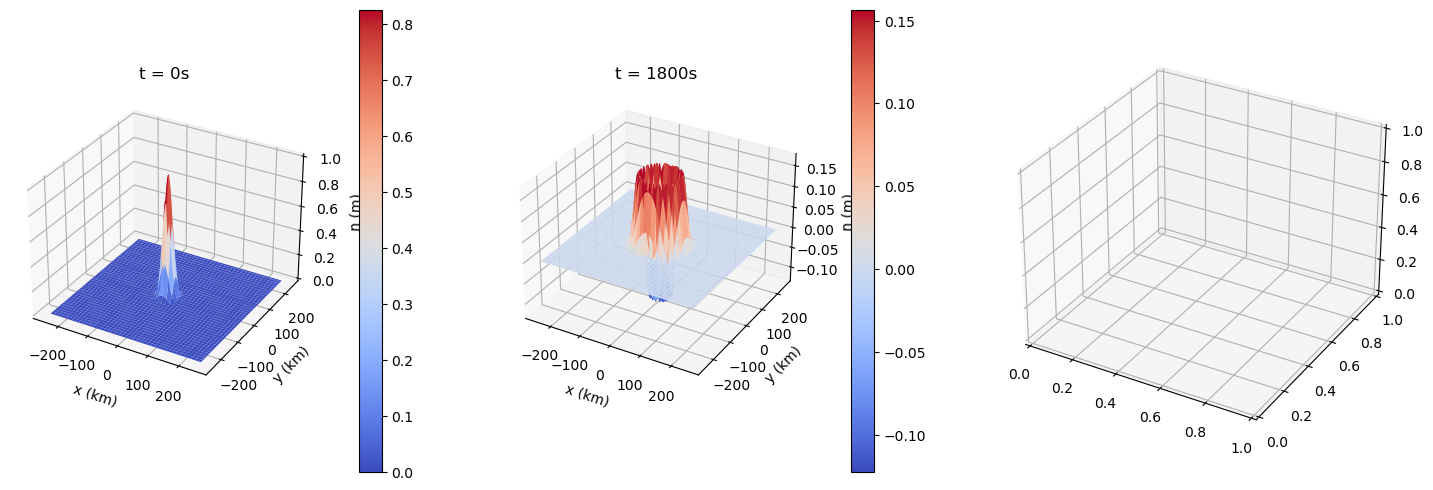

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
H = 100
g = 9.81
c = np.sqrt(g * H)
ax = 20e3
ay = 20e3
m = 2
dx = 2e3
dy = 2e3
dt = 50  # Choose dt based on the stability condition
timesteps = 3600 // dt

# Domain
x = np.arange(-250e3, 250e3 + dx, dx)
y = np.arange(-250e3, 250e3 + dy, dy)
X, Y = np.meshgrid(x, y)

# Initial condition
phi_0 = np.exp(-(X / ax) ** m) * np.exp(-(Y / ay) ** m)

# Initialize arrays for phi
phi = np.zeros((len(x), len(y), 3))
phi[:, :, 0] = phi_0
phi[:, :, 1] = phi_0  # Assuming no initial velocity

# Finite difference method
for n in range(1, timesteps):
    phi_x = np.roll(phi[:, :, 1], -1, axis=0) - 2 * phi[:, :, 1] + np.roll(phi[:, :, 1], 1, axis=0)
    phi_y = np.roll(phi[:, :, 1], -1, axis=1) - 2 * phi[:, :, 1] + np.roll(phi[:, :, 1], 1, axis=1)
    laplacian = phi_x / dx ** 2 + phi_y / dy ** 2
    phi[:, :, 2] = 2 * phi[:, :, 1] - phi[:, :, 0] + c ** 2 * dt ** 2 * laplacian

    # Update phi values
    phi[:, :, 0] = phi[:, :, 1]
    phi[:, :, 1] = phi[:, :, 2]

    # Save results at t = 1800 and t = 3600
    if n * dt == 1800:
        phi_1800 = np.copy(phi[:, :, 2])
    elif n * dt == 3600:
        phi_3600 = np.copy(phi[:, :, 2])

# Plot the numerical solution at t = 0, t = 1800, and t = 3600
fig = plt.figure(figsize=(18, 6))
times = [0, 1800, 3600]
phi_array = [phi_0, phi_1800]

for i, t in enumerate(times):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    surf = ax.plot_surface(X / 1e3, Y / 1e3, phi_array[i], cmap='coolwarm', edgecolor='none')
    ax.set_title(f't = {t}s')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    ax.set_zlabel('η (m)')
    fig.colorbar(surf, ax=ax, pad=0.1)

plt.suptitle('Numerical solution η at different times')
plt.tight_layout()
plt.show()


In [ ]:
2000/(981)

In [ ]:
import matplotlib.pyplot as plt

# Define domain and parameters
Lx, Ly = 500, 500
H = 100
ax, ay = 20, 20
m = 2
c = np.sqrt(H)
dx, dy = 2, 2
dt = dx / (c * np.sqrt(2))

Nx = int(Lx / dx) + 1
Ny = int(Ly / dy) + 1
Nt = int(3600 / dt) + 1

# Define initial condition function
def f(x, y):
    return np.exp((x / ax) ** m) * np.exp((y / ay) ** m)

# Initialize the phi matrix
phi = np.zeros((Nx, Ny, Nt))

# Set the initial condition
x = np.linspace(-250, 250, Nx)
y = np.linspace(-250, 250, Ny)
X, Y = np.meshgrid(x, y)
phi[:, :, 0] = f(X, Y)

# Implement the leapfrog scheme
for n in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            phi[i, j, n + 1] = 2 * phi[i, j, n] - phi[i, j, n - 1] + c**2 * dt**2 * (
                (phi[i + 1, j, n] - 2 * phi[i, j, n] + phi[i - 1, j, n]) / dx**2 +
                (phi[i, j + 1, n] - 2 * phi[i, j, n] + phi[i, j - 1, n]) / dy**2
            )

# Plot the numerical solution at t = 0 s, t = 1800 s, and t = 3600 s
times = [0, 1800, 3600]
# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

times = [0, 1800, 3600]
for i, t in enumerate(times):
    t_index = int(t / dt)
    axes[i].imshow(phi[:, :, t_index], origin='lower', extent=(-250, 250, -250, 250))
    axes[i].set_title(f't = {t} s')
    axes[i].set_xlabel('x (km)')
    axes[i].set_ylabel('y (km)')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
H = 100
ax = 20e3
ay = 20e3
m = 2
Lx = 500e3
Ly = 500e3
dx = 2e3
dy = 2e3
c = np.sqrt(9.81 * H)
dt = dx / (c * np.sqrt(2))

# Time steps
t0 = 0
t1 = 1800
t2 = 3600

# Grid
x = np.arange(-250e3, 250e3, dx)
y = np.arange(-250e3, 250e3, dy)
X, Y = np.meshgrid(x, y)

# Initial condition
phi0 = np.exp((X / ax) ** m) * np.exp((Y / ay) ** m)

# Function to update phi
def update_phi(phi_n, phi_nm1, dt, dx, dy, c):
    Nx, Ny = phi_n.shape
    phi_np1 = np.zeros_like(phi_n)

    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            phi_np1[i, j] = (
                2 * phi_n[i, j]
                - phi_nm1[i, j]
                + c ** 2 * dt ** 2 * (
                    (phi_n[i + 1, j] - 2 * phi_n[i, j] + phi_n[i - 1, j]) / dx ** 2
                    + (phi_n[i, j + 1] - 2 * phi_n[i, j] + phi_n[i, j - 1]) / dy ** 2
                )
            )

    return phi_np1

# Time evolution
phi_nm1 = phi0
phi_n = phi0
time = t0

while time <= t2 + dt / 2:
    phi_np1 = update_phi(phi_n, phi_nm1, dt, dx, dy, c)
    phi_nm1 = phi_n
    phi_n = phi_np1
    time += dt

    if abs(time - t1) < dt / 2:
        phi_t1 = phi_n
    elif abs(time - t2) < dt / 2:
        phi_t2 = phi_n

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# t = 0 s
c0 = ax[0].contourf(X / 1e3, Y / 1e3, phi0)
ax[0].set_title('t = 0 s')
fig.colorbar(c0, ax=ax[0])

# t = 1800 s
c1 = ax[1].contourf(X / 1e3, Y / 1e3, phi_t1)
ax[1].set_title('t = 1800 s')
fig.colorbar(c1, ax=ax[1])

# t = 3600 s
c2 = ax[2].contourf(X / 1e3, Y / 1e3, phi_t2)
ax[2].set_title('t = 3600 s')
fig.colorbar(c2, ax=ax[2])

plt.show()


In [ ]:
print(n, t, dt)

In [ ]:
dt = dx / (c * 2)
dt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt

# Parameters
Lx, Ly = 500, 500
H = 100
ax, ay = 20, 20
m = 2
dx, dy = 2, 2
g = 9.81
c = sqrt(g * H)
dt = dx / (c * sqrt(2))

nx, ny = int(Lx / dx) + 1, int(Ly / dy) + 1
nt = int(3600 / dt) + 1
x = np.linspace(-250, 250, nx)
y = np.linspace(-250, 250, ny)

# Initial condition
def f(x, y):
    return exp((x / ax) ** m) * exp((y / ay) ** m)

phi = np.zeros((nx, ny, nt))
for i in range(nx):
    for j in range(ny):
        phi[i, j, 0] = f(x[i], y[j])

# Leapfrog centered in space and time
for n in range(1, nt - 1):
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            phi[i, j, n + 1] = 2 * phi[i, j, n] - phi[i, j, n - 1] + c**2 * dt**2 * (
                (phi[i + 1, j, n] - 2 * phi[i, j, n] + phi[i - 1, j, n]) / dx**2
                + (phi[i, j + 1, n] - 2 * phi[i, j, n] + phi[i, j - 1, n]) / dy**2
            )

# Plot the numerical solution
def plot_solution(t_index, title):
    plt.imshow(phi[:, :, t_index].T, origin="lower", extent=(-250, 250, -250, 250), cmap="viridis")
    plt.colorbar(label="Amplitude")
    plt.xlabel("x (km)")
    plt.ylabel("y (km)")
    plt.title(title)
    plt.show()

plot_solution(0, "t = 0 s")
plot_solution(int(1800 / dt), "t = 1800 s")
plot_solution(int(3600 / dt), "t = 3600 s")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
g = 9.81
H = 100
c = np.sqrt(g * H)
ax = ay = 20e3
m = 2
Lx = Ly = 250e3
dx = dy = 2e3  # 2 km in meters
Nx = Ny = int(Lx / dx) 
dt = 1
T = (0,3600,dt)
#Nt = int(T / dt) + 1

# Define initial condition function
def f(x, y):
    return np.exp((x / ax) ** m) * np.exp((y / ay) ** m)

# Create grids
x = np.linspace(-250, 250, 2)
y = np.linspace(-250, 250, 2)
X, Y = np.meshgrid(x, y)

# Initialize phi arrays
phi = np.zeros(len(x), len(y), len(T))
phi[:, :, 0] = f(X, Y)
phi[:, :, 1] = f(X, Y)

# Leapfrog time-stepping
for n in range(1, len(t)):
    for i in range(1, len(x)):
        for j in range(1, len(y)):
            phi[i, j, n + 1] = 2 * phi[i, j, n] - phi[i, j, n - 1] + c**2 * dt**2 * (
                (phi[i + 1, j, n] - 2 * phi[i, j, n] + phi[i - 1, j, n]) / dx**2 +
                (phi[i, j + 1, n] - 2 * phi[i, j, n] + phi[i, j - 1, n]) / dy**2
            )

# Plot the numerical solution at t = 0, 1800, and 3600 seconds
timesteps = [0, 1800, 3600]
fig = plt.figure(figsize=(15, 5))
for idx, t in enumerate(timesteps):
    n = int(t / dt)
    ax = fig.add_subplot(1, 3, idx + 1)
    surf = ax.pcolormesh(X/1000, Y/1000, phi[:, :, n], cmap='viridis', edgecolor='none', vmin=-0.2, vmax=0.2)
    ax.set_title(f't = {t} s')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    #ax.set_zlabel('$\phi$')
    fig.colorbar(surf, ax=ax, shrink=0.7)

plt.tight_layout()
plt.show


In [ ]:
int(Lx / dx) + 1

In [ ]:
g = 9.81
H = 100
c = np.sqrt(g * H)
ax = ay = 20e3
m = 2
Lx = Ly = 500e3
Nx = Ny = int(Lx / 2e3) + 1
dx = dy = Lx / (Nx - 1)
dt = dx / (c * np.sqrt(2))
T = 3600
Nt = int(T / dt) + 1
print(Lx, Nx, dx)

In [ ]:
int(Lx / 2e3)

In [ ]:
c**2 * dt**2 / dy**2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 250e3  # domain size
H = 100  # depth
ax = 20e3  # wave width in x direction
ay = 20e3  # wave width in y direction
m = 2  # wave steepness parameter
c = np.sqrt(9.81*H)  # wave speed
dx = dy = 2e3  # grid spacing
dt = dx/(c*np.sqrt(2))  # time step
nt = 360001  # number of time steps

# Create grid
x = np.arange(-L, L+dx, dx)
y = np.arange(-L, L+dy, dy)
X, Y = np.meshgrid(x, y)

# Define initial condition
phi = np.exp(-(X/ax)**m)*np.exp(-(Y/ay)**m)
# Initialize variables
phi_new = np.zeros_like(phi)
phi_old = np.zeros_like(phi)

# Set initial conditions
phi_new[:] = phi
phi_old[:] = phi

# Initialize figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Implement the numerical solution
for n in range(1, nt):
    # Update phi using the leapfrog method
    phi_new[1:-1, 1:-1] = 2*phi[1:-1, 1:-1] - phi_old[1:-1, 1:-1] + \
        (c*dt)**2*((phi[2:, 1:-1] - 2*phi[1:-1, 1:-1] + phi[:-2, 1:-1])/dx**2 + \
        (phi[1:-1, 2:] - 2*phi[1:-1, 1:-1] + phi[1:-1, :-2])/dy**2)
    
    # Apply boundary conditions (periodic)
    phi_new[:, 0] = phi_new[:, -2]
    phi_new[:, -1] = phi_new[:, 1]
    phi_new[0, :] = phi_new[-2, :]
    phi_new[-1, :] = phi_new[1, :]
    
    # Update phi_old and phi
    phi_old[:] = phi
    phi[:] = phi_new
    
    # Plot solution at selected times
    if n*dt == 0 or n*dt == 1800 or n*dt == 3600:
        i = int(n*dt/1800)  # subplot index
        im = axs[i-1].pcolor(X/1e3, Y/1e3, phi, cmap='RdBu_r')
        axs[i-1].set_xlabel('x (km)')
        axs[i-1].set_ylabel('y (km)')
        axs[i-1].set_title('t = {} s'.format(n*dt))
        plt.colorbar(im, ax=axs[i-1])  # add colorbar to subplot
        plt.pause(0.1)  # display plot and wait for 0.1 seconds

# Show the figure
plt.show()


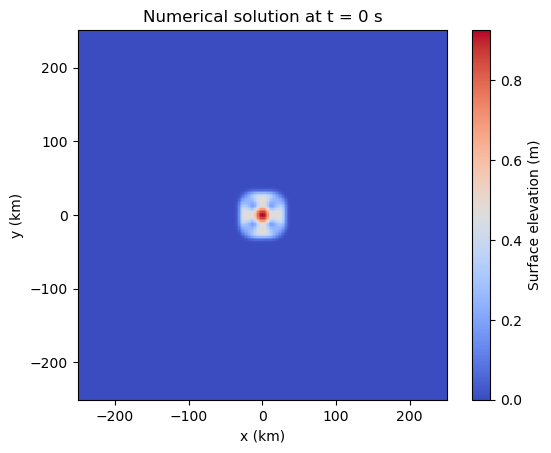

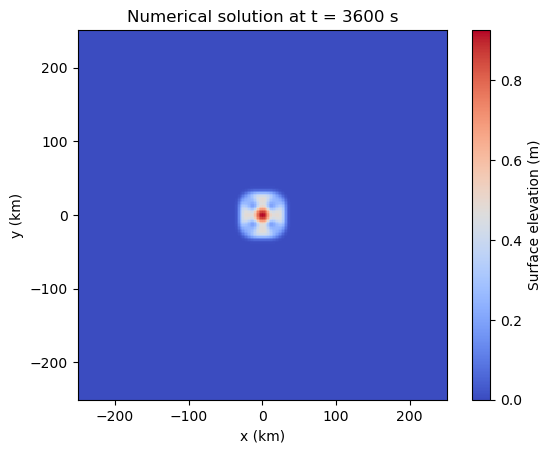

In [3]:
import numpy as np

# Define grid parameters
L = 250000  # domain size in meters
dx = dy = 2000  # grid spacing in meters
Nx = Ny = int(2*L/dx) + 1  # number of grid points in each direction
dt = 1.4  # time step in seconds
Nt = 260  # number of time steps

# Define wave parameters
ax = ay = 20000  # wavelength in meters
m = 6

# Initialize grid with initial condition
x = np.linspace(-L, L, Nx)
y = np.linspace(-L, L, Ny)
xx, yy = np.meshgrid(x, y)
phi = np.exp(-(xx/ax)**m) * np.exp(-(yy/ay)**m)
phi_old = phi.copy()
# Implement leapfrog method
for n in range(1, Nt):
    # Compute second-order spatial derivatives using central differences
    d2x_phi = (np.roll(phi, -1, axis=0) - 2*phi + np.roll(phi, 1, axis=0)) / dx**2
    d2y_phi = (np.roll(phi, -1, axis=1) - 2*phi + np.roll(phi, 1, axis=1)) / dy**2
    
    # Compute new time step using leapfrog method
    phi_new = 2*phi - phi_old + c**2*dt**2*(d2x_phi + d2y_phi)
    
    # Update old time steps
    phi_old = phi.copy()
    phi = phi_new.copy()
import matplotlib.pyplot as plt

# Plot numerical solution at t = 0 s
fig, ax = plt.subplots()
pcm = ax.pcolormesh(x/1000, y/1000, phi, cmap='coolwarm')
ax.set_aspect('equal')
ax.set_title('Numerical solution at t = 0 s')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
cbar = plt.colorbar(pcm)
cbar.set_label('Surface elevation (m)')

#Plot numerical solution at t = 3600 s
fig, ax = plt.subplots()
pcm = ax.pcolormesh(x/1000, y/1000, phi, cmap='coolwarm')
ax.set_aspect('equal')
ax.set_title('Numerical solution at t = 3600 s')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
cbar = plt.colorbar(pcm)
cbar.set_label('Surface elevation (m)')

plt.show()


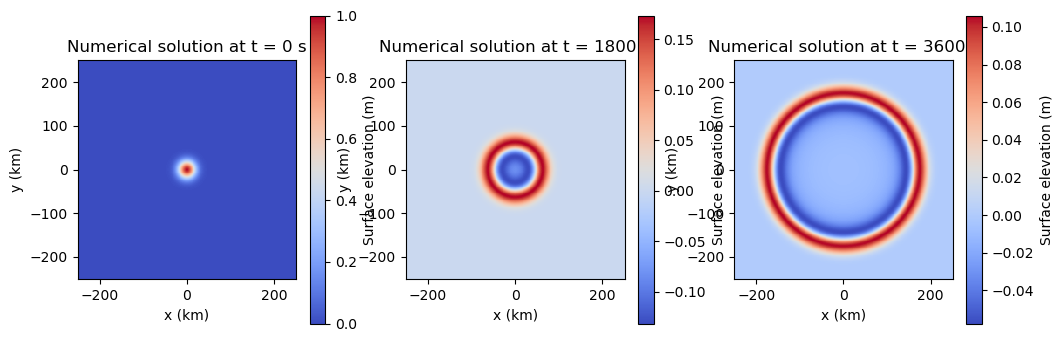

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
L = 500000  # domain size in meters
dx = dy = 2000  # grid spacing in meters
Nx = Ny = int(L/dx) + 1  # number of grid points in each direction
#dt = 1.44  # time step in seconds
#Nt = 260  # number of time steps
# Compute wave speed
g = 9.81  # acceleration due to gravity in m/s^2
H = 100  # water depth in meters
c = np.sqrt(g*H)
dt = dx / (c * np.sqrt(2)+30)
T = 3600
Nt = int(T / dt) + 1
# Define wave parameters
ax = ay = 20000  # wavelength in meters
m = 2



# Initialize grid with initial condition
x = np.linspace(-L/2, L/2, Nx)
y = np.linspace(-L/2, L/2, Ny)
xx, yy = np.meshgrid(x, y)
phi = np.exp(-(xx/ax)**m) * np.exp(-(yy/ay)**m)
phi_old = phi.copy()

# Plot numerical solutions at specified times
times = [0, 1800, 3600]
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, t in enumerate(times):
    # Implement leapfrog method for specified time
    for n in range(int(t/dt)):
        # Compute second-order spatial derivatives using central differences
        d2x_phi = (np.roll(phi, -1, axis=0) - 2*phi + np.roll(phi, 1, axis=0)) / dx**2
        d2y_phi = (np.roll(phi, -1, axis=1) - 2*phi + np.roll(phi, 1, axis=1)) / dy**2

        # Compute new time step using leapfrog method
        phi_new = 2*phi - phi_old + c**2*dt**2*(d2x_phi + d2y_phi)

        # Update old time steps
        phi_old = phi.copy()
        phi = phi_new.copy()
        
    # Plot numerical solution at specified time
    pcm = axs[i].pcolormesh(x/1000, y/1000, phi, cmap='coolwarm')
    axs[i].set_aspect('equal')
    axs[i].set_title(f'Numerical solution at t = {t} s')
    axs[i].set_xlabel('x (km)')
    axs[i].set_ylabel('y (km)')
    cbar = plt.colorbar(pcm, ax=axs[i])
    cbar.set_label('Surface elevation (m)')

plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt

phi_old = phi.copy()
errors=[]
for n in range(Nt):
    # Compute second-order spatial derivatives using central differences
    d2x_phi = (np.roll(phi, -1, axis=0) - 2*phi + np.roll(phi, 1, axis=0)) / dx**2
    d2y_phi = (np.roll(phi, -1, axis=1) - 2*phi + np.roll(phi, 1, axis=1)) / dy**2

    # Compute new time step using leapfrog method
    phi_new = 2*phi - phi_old + c**2*dt**2*(d2x_phi + d2y_phi)

    # Update old time steps
    phi_old = phi.copy()
    phi = phi_new.copy()

    # Compute L2 norm of error
    error = np.sqrt(np.sum((phi[n])**2))
    errors.append(error)


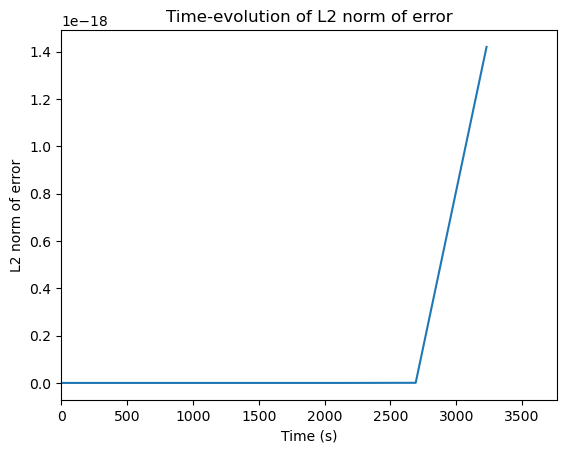

In [13]:
# Plot time-evolution of L2 norm of error
# Plot time-evolution of L2 norm of error
plt.plot(np.arange(Nt)*dt, errors)
plt.xlabel('Time (s)')
plt.ylabel('L2 norm of error')
plt.title('Time-evolution of L2 norm of error')
plt.xlim(0, Nt*dt)
plt.show()



$\lvert \lvert \phi_2 \rvert \rvert = \left(\sum_{i,j=1}^{N}\lvert \phi_{i,j} \rvert^2 \Delta x \Delta y \right)^{1/2} $ 

errors

$\lvert \lvert \phi_2 \rvert \rvert = \left(\sum_{i,j=1}^{N}\lvert \phi_{i,j} - \phi^*_{i,j} \rvert^2 \Delta x \Delta y \right)^{1/2}$

$\lvert \lvert \epsilon \rvert \rvert = \left(\sum_{i,j=1}^{N}\lvert \epsilon_{i,j} \rvert^2 \Delta x \Delta y \right)^{1/2}$

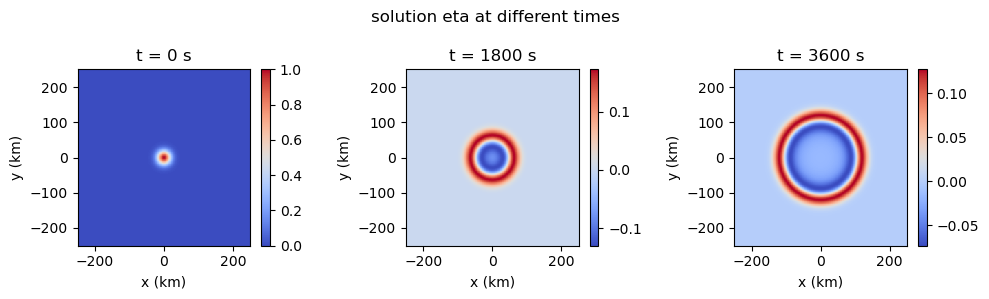

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

# Constants
H = 100
ax = ay = 20e3  


# Domain
Nx = Ny = int(500/2)
x = np.linspace(-250e3, 250e3, Nx+1) 
y = np.linspace(-250e3, 250e3, Ny+1)
x_grid, y_grid = np.meshgrid(x, y)

# Initial condition
f = np.exp(-(x_grid/ax)**2) * np.exp(-(y_grid/ay)**2)


# Wavenumbers
k = 2 * np.pi * fftshift(np.fft.fftfreq(len(x), x[1] - x[0]))
l = 2 * np.pi * fftshift(np.fft.fftfreq(len(y), y[1] - y[0]))
k_grid, l_grid = np.meshgrid(k, l)

# Fourier transform of initial condition
f_hat = fftshift(fft2(f))

# Dispersion
omega = np.sqrt(9.81 * H * (k_grid**2 + l_grid**2))

# Function to calculate η(x, y, t) based on the given initial condition and time
def eta(f_hat, omega, t):
    eta_hat = f_hat * np.cos(omega * t)
    return np.real(ifft2(ifftshift(eta_hat)))

# Plotting
fig = plt.figure(figsize=(10, 3))

time = [0, 1800, 3600]

for i, t in enumerate(time):
    eta_t = eta(f_hat, omega, t)
    ax= fig.add_subplot(1, 3, i+1,)
    cb_vals=ax.pcolormesh(x_grid/1e3, y_grid/1e3, eta_t, cmap='coolwarm')
    ax.set_title(f't = {t} s')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    fig.colorbar(cb_vals, ax=ax)

plt.suptitle('solution eta at different times')
plt.tight_layout()
plt.show()

#

In [7]:
phi

array([[8.30394356e-36, 2.13237600e-35, 6.68961292e-35, ...,
        6.68961292e-35, 2.13237600e-35, 8.30394356e-36],
       [2.13237600e-35, 5.44307688e-35, 1.69809617e-34, ...,
        1.69809617e-34, 5.44307688e-35, 2.13237600e-35],
       [6.68961292e-35, 1.69809617e-34, 5.27014732e-34, ...,
        5.27014732e-34, 1.69809617e-34, 6.68961292e-35],
       ...,
       [6.68961292e-35, 1.69809617e-34, 5.27014732e-34, ...,
        5.27014732e-34, 1.69809617e-34, 6.68961292e-35],
       [2.13237600e-35, 5.44307688e-35, 1.69809617e-34, ...,
        1.69809617e-34, 5.44307688e-35, 2.13237600e-35],
       [8.30394356e-36, 2.13237600e-35, 6.68961292e-35, ...,
        6.68961292e-35, 2.13237600e-35, 8.30394356e-36]])

In [ ]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import  fftshift,fft2, ifft2, ifftshift

# Constants
Lx, Ly = 500000, 500000
ax, ay = 20000, 20000
dx, dy = 2000, 2000
Nx, Ny = Lx/dx, Ly/dy
m = 2
g = 9.81
H = 100
dt = 30
t = np.arange(0,3601,dt)
mu_x=np.sqrt(g*H)*dt/dx
mu_y=np.sqrt(g*H)*dt/dy
# Domain
x = np.arange(-250000,250000+dx,dx)
y = np.arange(-250000,250000+dx,dy)
x_grid, y_grid = np.meshgrid(x, y)

# Wavenumbers
k=2*np.pi*fftshift(np.fft.fftfreq(len(x), dx))
l=2*np.pi*fftshift(np.fft.fftfreq(len(y), dy))
k_grid, l_grid = np.meshgrid(k,l)

# Dispersion relation
omega = np.sqrt(g*H*(k_grid**2+l_grid**2))

# Initial condition
fxy = np.exp(-(x_grid / ax) ** m) * np.exp(-(y_grid / ay) ** m)
ffxy = fftshift(fft2(fxy))

Numerical_solution = np.zeros((len(x), len(y), len(t)))
Numerical_solution[:, :, 0] = fxy
Numerical_solution[:, :, 1] = fxy

for n in range(1, len(t)-1):
    for i in range(1, len(x)-1):
        for j in range(1, len(y)-1):
            Numerical_solution[i,j, n+1] = 2 * Numerical_solution[i, j, n] - Numerical_solution[i,j, n-1] + mu_x * (Numerical_solution[i+1, j,n] + Numerical_solution[i-1, j,n] - 2 * Numerical_solution[i,j, n])+  mu_y(Numerical_solution[i, j+1 ,n] + Numerical_solution[i, j-1 ,n] - 2 * Numerical_solution[i, j, n])